In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#导入数据
original_games_data = pd.read_csv('D:/Vortex Mods/homework/练习数据/games.csv')

In [3]:
#观察数据，确定分析目标。
original_games_data.head(10)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,1.8K,1.1K,230
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
7,7,Metroid Dread,"Oct 07, 2021","['Nintendo', 'MercurySteam']",4.3,2.1K,2.1K,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9.2K,759,3.4K,3.3K
8,8,Among Us,"Jun 15, 2018",['InnerSloth'],3.0,867,867,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25K,470,776,126
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K


- `Title` 游戏名称
- `Release Date` 发行日期
- `Team` 开发团队
- `Rating` 评级
- `Times Listed` 列出此游戏的用户数量（参与评分的用户数量）
- `Number of Reviews` 用户提供的评论数量
- `Genres` 游戏所属的所有类型/流派
- `Summary` 团队提供的摘要/概述
- `Reviews` 用户的评价/评论
- `Plays` 玩家总数
- `Playing` 最近还在游玩的人数
- `Backlogs` 没完玩游戏的玩家
- `Wishlist` 在愿望单中

## 分析：什么类型的玩家黏稠度高，游戏评分是否对用户粘稠度有影响。分析那家工作室制作的那类游戏最受玩家欢迎。

### 清洗数据

#### 检查数据类型是否需要修改,是否是整洁的数据结构,观察数据是否存在缺失值。

In [4]:
clean_games_data = original_games_data.copy()
clean_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


`Unnamed: 0`属于无效数据需要删除。`Release Date`需要修改为日期型。`Times Listed`,`Number of Reviews	`,`Plays`,`Playing`,`Backlogs`,`Wishlist`需要修改为int类型,其中的"K"需要替换为"*1000"。`Team`,`Genres`需要拆分。`Rating`存在缺失值。

In [5]:
clean_games_data = clean_games_data.drop('Unnamed: 0',axis=1)

In [6]:
clean_games_data.head(5)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [7]:
#修改Release Date的类型为日期型。
#clean_games_data['Release Date'] = pd.to_datetime(clean_games_data['Release Date'])

In [8]:
#将Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist需要修改为int类型,其中的"K"需要替换为"*1000"。
unit_replacements = {r"K":"e3"}
clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']] = clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']].replace(unit_replacements, regex=True).astype(float)

In [9]:
clean_games_data.head(5)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0


In [10]:
#转换数据类型
clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']]=clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']].astype(int)

In [11]:
#删除Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist中".0"
clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']] = clean_games_data[['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']].round(0)
clean_games_data

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [12]:
#拆分Team,Genres
clean_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   int64  
 5   Number of Reviews  1512 non-null   int64  
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   int64  
 10  Playing            1512 non-null   int64  
 11  Backlogs           1512 non-null   int64  
 12  Wishlist           1512 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 153.7+ KB


In [13]:
clean_games_data['Team'].describe()

count           1511
unique           764
top       ['Capcom']
freq              35
Name: Team, dtype: object

In [14]:
clean_games_data['Team'].value_counts() 

Team
['Capcom']                                  35
['Square Enix']                             31
['Nintendo', 'Game Freak']                  19
['Nintendo']                                19
['Nintendo', 'Nintendo EAD']                19
                                            ..
['Nintendo', 'Jupiter Corporation']          1
['Jupiter Corp.', 'Jupiter Corporation']     1
['Riot Forge', 'Airship Syndicate']          1
['THQ', 'Blue Tongue Entertainment']         1
['Nintendo', 'Ambrella']                     1
Name: count, Length: 764, dtype: int64

In [15]:
clean_games_data = clean_games_data.dropna(subset='Team')

In [16]:
#首先需要转换Team,Genres格式,注意这个方法只能调用一次，再次调用就会出错。
clean_games_data['Team'] = clean_games_data['Team'].apply(lambda x: eval(x))

C:\Users\22247\AppData\Local\Temp\ipykernel_28408\4026215877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_games_data['Team'] = clean_games_data['Team'].apply(lambda x: eval(x))


In [17]:
clean_games_data['Team']

0            [Bandai Namco Entertainment, FromSoftware]
1                                    [Supergiant Games]
2       [Nintendo, Nintendo EPD Production Group No. 3]
3                                        [tobyfox, 8-4]
4                                         [Team Cherry]
                             ...                       
1507                                   [Telltale Games]
1508                               [Sumo Digital, Sega]
1509                                           [Capcom]
1510                                   [Larian Studios]
1511                              [WB Games, TT Fusion]
Name: Team, Length: 1511, dtype: object

In [18]:
clean_games_data = clean_games_data.explode('Team')

In [19]:
clean_games_data

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo EPD Production Group No. 3,4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Team Sonic Racing,"May 21, 2019",Sega,2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500,49,413,107
1509,Dragon's Dogma,"May 22, 2012",Capcom,3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73


In [20]:
#修改Genres格式并且江苏据拆分开
clean_games_data['Genres'] = clean_games_data['Genres'].apply(lambda x: eval(x))

In [21]:
clean_games_data['Genres']

0                                        [Adventure, RPG]
0                                        [Adventure, RPG]
1                        [Adventure, Brawler, Indie, RPG]
2                                        [Adventure, RPG]
2                                        [Adventure, RPG]
                              ...                        
1508                                     [Arcade, Racing]
1509                                       [Brawler, RPG]
1510    [Adventure, RPG, Strategy, Tactical, Turn Base...
1511                                  [Adventure, Puzzle]
1511                                  [Adventure, Puzzle]
Name: Genres, Length: 2710, dtype: object

In [22]:
clean_games_data = clean_games_data.explode('Genres')

In [23]:
clean_games_data

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900,2900,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165,165,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73
1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184,184,Puzzle,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73
1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73


现在已经将数据格式转换为适合分析的干净整洁的数据格式。接下来我们需要检查不一致数据，缺失数据，重复数据，无效数据。

### 检查不一致数据。

`Team`,`Genres`可能存在缺失数据。

要完整展示结果，可以把`display.max_rows`设置为`None`，即取消展示行数上限。但因为我们只是在当前调用`value_counts`时才需要看完整结果，所以可以结合`option_context`，只更改临时上限。

In [24]:
with pd.option_context('display.max_rows', None):
    print(clean_games_data['Team'].value_counts())

Team
Nintendo                                           527
Capcom                                             201
Square Enix                                        167
Sega                                               148
Electronic Arts                                    125
Sony Interactive Entertainment                      98
Konami                                              97
Atlus                                               92
Game Freak                                          86
Devolver Digital                                    85
Bandai Namco Entertainment                          81
Annapurna Interactive                               69
Ubisoft Entertainment                               69
Bethesda Softworks                                  66
Nintendo EAD                                        65
Activision                                          59
Intelligent Systems Co., Ltd.                       58
FromSoftware                                        58
Sony 

由于对工作室名称不太了解，其中包含许多子工作室，难以分辨。所以以后在查。

In [25]:
clean_games_data['Genres'].value_counts()

Genres
Adventure              1836
RPG                     939
Shooter                 656
Platform                597
Indie                   460
Puzzle                  309
Brawler                 295
Strategy                244
Simulator               209
Turn Based Strategy     184
Fighting                136
Visual Novel            119
Arcade                  119
Tactical                 87
Point-and-Click          81
Racing                   73
Sport                    43
Music                    41
Card & Board Game        25
Real Time Strategy       17
MOBA                      6
Quiz/Trivia               6
Pinball                   2
Name: count, dtype: int64

检查后发现不存在重复数据。

### 检查缺失数据

In [26]:
clean_games_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6488 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              6488 non-null   object 
 1   Release Date       6488 non-null   object 
 2   Team               6488 non-null   object 
 3   Rating             6456 non-null   float64
 4   Times Listed       6488 non-null   int64  
 5   Number of Reviews  6488 non-null   int64  
 6   Genres             6484 non-null   object 
 7   Summary            6486 non-null   object 
 8   Reviews            6488 non-null   object 
 9   Plays              6488 non-null   int64  
 10  Playing            6488 non-null   int64  
 11  Backlogs           6488 non-null   int64  
 12  Wishlist           6488 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 709.6+ KB


In [27]:
clean_games_data[clean_games_data['Rating'].isnull()]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023",Square Enix,NaN,422,422,RPG,Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2400
587,Final Fantasy XVI,"Jun 22, 2023",Square Enix Creative Business Unit III,NaN,422,422,RPG,Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2400
649,Death Stranding 2,releases on TBD,Kojima Productions,NaN,105,105,Adventure,NaN,[],3,0,209,644
649,Death Stranding 2,releases on TBD,Kojima Productions,NaN,105,105,Shooter,NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",Square Enix,NaN,192,192,NaN,This next standalone chapter in the FINAL FANT...,[],20,3,354,1100
719,Lies of P,"Aug 01, 2023",NEOWIZ,NaN,175,175,RPG,"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
719,Lies of P,"Aug 01, 2023",Round8 Studio,NaN,175,175,RPG,"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",Ghost Story Games,NaN,90,90,Adventure,A disintegrating starship. A desperate escape ...,[],1,0,92,437
726,Judas,"Mar 31, 2025",Ghost Story Games,NaN,90,90,Shooter,A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023",Ryū Ga Gotoku Studios,NaN,118,118,Adventure,This game covers Kiryu's story between Yakuza ...,[],2,1,145,588


发现没有`Rating`的游戏游玩人数并不多，还在玩的人数也不多，而`Rating`又是分析中的重要数据，我们先储存起来然后删除数据。

In [28]:
games_Rating_isnull = clean_games_data[clean_games_data['Rating'].isnull()]
games_Rating_isnull

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023",Square Enix,NaN,422,422,RPG,Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2400
587,Final Fantasy XVI,"Jun 22, 2023",Square Enix Creative Business Unit III,NaN,422,422,RPG,Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2400
649,Death Stranding 2,releases on TBD,Kojima Productions,NaN,105,105,Adventure,NaN,[],3,0,209,644
649,Death Stranding 2,releases on TBD,Kojima Productions,NaN,105,105,Shooter,NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",Square Enix,NaN,192,192,NaN,This next standalone chapter in the FINAL FANT...,[],20,3,354,1100
719,Lies of P,"Aug 01, 2023",NEOWIZ,NaN,175,175,RPG,"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
719,Lies of P,"Aug 01, 2023",Round8 Studio,NaN,175,175,RPG,"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",Ghost Story Games,NaN,90,90,Adventure,A disintegrating starship. A desperate escape ...,[],1,0,92,437
726,Judas,"Mar 31, 2025",Ghost Story Games,NaN,90,90,Shooter,A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023",Ryū Ga Gotoku Studios,NaN,118,118,Adventure,This game covers Kiryu's story between Yakuza ...,[],2,1,145,588


In [29]:
clean_games_data = clean_games_data.dropna(subset=['Rating'])

In [30]:
clean_games_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6456 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              6456 non-null   object 
 1   Release Date       6456 non-null   object 
 2   Team               6456 non-null   object 
 3   Rating             6456 non-null   float64
 4   Times Listed       6456 non-null   int64  
 5   Number of Reviews  6456 non-null   int64  
 6   Genres             6453 non-null   object 
 7   Summary            6456 non-null   object 
 8   Reviews            6456 non-null   object 
 9   Plays              6456 non-null   int64  
 10  Playing            6456 non-null   int64  
 11  Backlogs           6456 non-null   int64  
 12  Wishlist           6456 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 706.1+ KB


再观察发现`Genres`还存在缺失值。

In [31]:
clean_games_data[clean_games_data['Genres'].isnull()]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1309,Armored Core 2,"Oct 26, 2000",FromSoftware,3.6,92,92,NaN,The genuine sequel to the original Armored Cor...,['the beginning is surprisingly hard. but the ...,278,18,232,119
1309,Armored Core 2,"Oct 26, 2000",Agetec,3.6,92,92,NaN,The genuine sequel to the original Armored Cor...,['the beginning is surprisingly hard. but the ...,278,18,232,119
1475,Peggle Deluxe,"Mar 06, 2007",PopCap Games,3.7,69,69,NaN,Take your best shot with energizing arcade fun...,"['dont look at me like that', 'Who tf actually...",939,18,70,13


查看这两个游戏是否还有其他`Genres`

In [43]:
clean_games_data.query('Title == "Armored Core 2"')

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1309,Armored Core 2,"Oct 26, 2000",FromSoftware,3.6,92,92,NaN,The genuine sequel to the original Armored Cor...,['the beginning is surprisingly hard. but the ...,278,18,232,119
1309,Armored Core 2,"Oct 26, 2000",Agetec,3.6,92,92,NaN,The genuine sequel to the original Armored Cor...,['the beginning is surprisingly hard. but the ...,278,18,232,119


In [44]:
clean_games_data.query('Title == "Peggle Deluxe"')

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1475,Peggle Deluxe,"Mar 06, 2007",PopCap Games,3.7,69,69,NaN,Take your best shot with energizing arcade fun...,"['dont look at me like that', 'Who tf actually...",939,18,70,13


经检查发现两个游戏不存在其他`Genres`，不会对第一个分析产生影响。可以暂时保留。

### 检查重复数据

In [49]:
clean_games_data.duplicated().sum()

np.int64(1667)

In [50]:
clean_games_data[clean_games_data.duplicated()]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
326,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
326,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
326,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
327,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900,2900,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Fatal Frame II: Crimson Butterfly,"Nov 27, 2003",Ubisoft Entertainment,4.2,398,398,Adventure,Crimson Butterfly is the second installment in...,['Pretty cool albeit a bit similar to the firs...,1000,38,690,513
1496,FIFA 13,"Sep 25, 2012",Electronic Arts,3.2,62,62,Simulator,FIFA 13 captures the drama and unpredictabilit...,"['Best FIFA.', ""First FIFA part that I played ...",1600,2,34,12
1496,FIFA 13,"Sep 25, 2012",Electronic Arts,3.2,62,62,Sport,FIFA 13 captures the drama and unpredictabilit...,"['Best FIFA.', ""First FIFA part that I played ...",1600,2,34,12
1496,FIFA 13,"Sep 25, 2012",EA Canada,3.2,62,62,Simulator,FIFA 13 captures the drama and unpredictabilit...,"['Best FIFA.', ""First FIFA part that I played ...",1600,2,34,12


In [53]:
clean_games_data = clean_games_data.drop_duplicates()

### 检查和删除无效数据

In [54]:
clean_games_data.describe()

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,3.677615,640.463562,640.463562,5155.021299,210.805596,1272.611610,656.255377
std,0.532389,588.070500,588.070500,5079.926567,355.796062,1192.332887,674.554102
min,0.700000,8.000000,8.000000,1.000000,0.000000,5.000000,2.000000
25%,3.400000,242.000000,242.000000,1500.000000,39.000000,427.000000,195.000000
50%,3.700000,466.000000,466.000000,3400.000000,90.000000,839.000000,458.000000
75%,4.100000,830.000000,830.000000,7200.000000,217.000000,1700.000000,842.000000
max,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,4800.000000


In [57]:
clean_games_data.to_csv("clean_games_data.csv",index=False)

经观察不存在无效数据。

### 分析数据

> **分析目标**：什么类型的玩家黏稠度高，游戏评分是否对用户粘稠度有影响。

In [55]:
games_keep_playing_study = clean_games_data.copy()

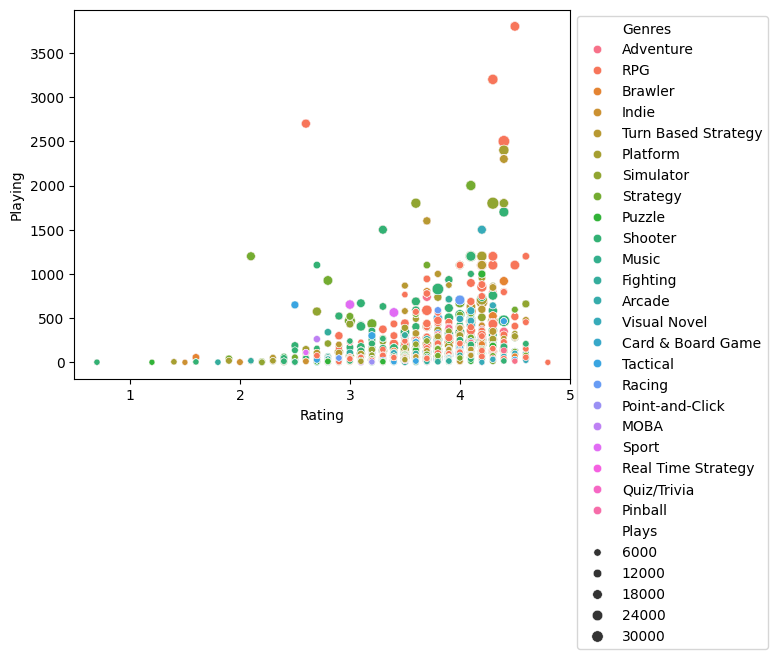

In [59]:
#首先画散点图，观察Rating	,Plays,Playing,Genres之间的影响。
sns.scatterplot(clean_games_data,x="Rating",y="Playing",hue="Genres",size="Plays")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

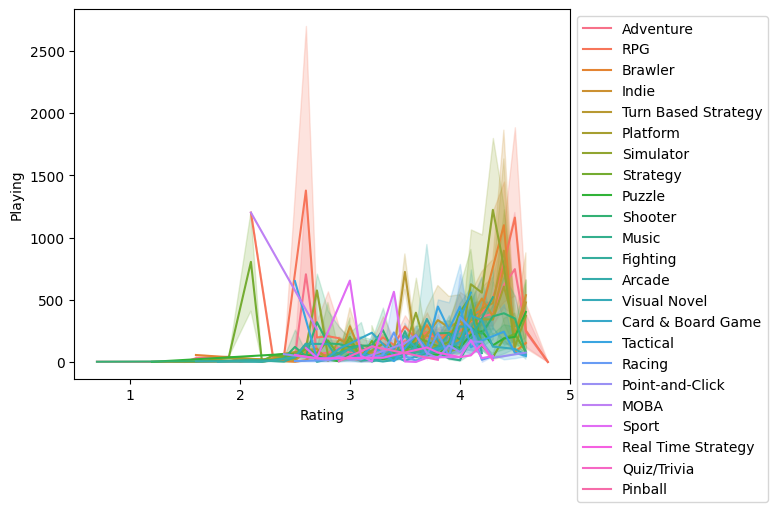

In [62]:
#画折线图，观察数据情况。
sns.lineplot(clean_games_data,x="Rating",y="Playing",hue="Genres")
plt.legend(bbox_to_anchor=(1,1))

没啥发现，认为需要加上发行时间，来接着分析，由于时间跨度较大，可以只要年份排除月份。

In [69]:
games_keep_playing_study[['drop','Release Year']] = games_keep_playing_study['Release Date'].str.split(pat=",",n=1,expand=True)

In [70]:
games_keep_playing_study

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,drop,Release Year
0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,Feb 25,2022
0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,Feb 25,2022
0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,Feb 25,2022
0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,Feb 25,2022
1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900,2900,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,Dec 10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165,165,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602,Oct 06,2020
1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,Feb 04,2014
1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184,184,Puzzle,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,Feb 04,2014
1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,Feb 04,2014


In [71]:
games_keep_playing_study =games_keep_playing_study.drop(['Release Date','drop'],axis=1)

In [72]:
games_keep_playing_study

,Title,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year
0,Elden Ring,Bandai Namco Entertainment,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022
0,Elden Ring,Bandai Namco Entertainment,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022
0,Elden Ring,FromSoftware,4.5,3900,3900,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022
0,Elden Ring,FromSoftware,4.5,3900,3900,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022
1,Hades,Supergiant Games,4.3,2900,2900,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,Larian Studios,4.1,165,165,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602,2020
1511,The LEGO Movie Videogame,WB Games,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,2014
1511,The LEGO Movie Videogame,WB Games,2.8,184,184,Puzzle,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,2014
1511,The LEGO Movie Videogame,TT Fusion,2.8,184,184,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700,11,239,73,2014


In [73]:
#转换年份格式